In [3]:
import numpy as np
import pandas as pd
import scipy
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
train_df = pd.read_csv('howpop_train.csv')
test_df = pd.read_csv('howpop_test.csv')
train_df.head(1).T
train_df.shape, test_df.shape

,0
url,https://habrahabr.ru/post/18284/
domain,habrahabr.ru
post_id,18284
published,2008-01-01 18:19:00
author,@Tapac
flow,develop
polling,False
content_len,4305
title,Новогодний подарок блоггерам — WordPress 2.3.2
comments,0


<Axes: >

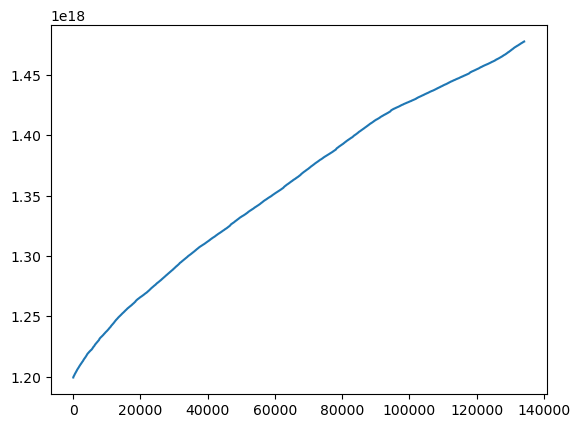

In [4]:
train_df['published'].apply(lambda ts:pd.to_datetime(ts).value).plot()

In [5]:
train_df.corr()

C:\Users\sholo\AppData\Local\Temp\ipykernel_3880\1233823885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,post_id,polling,content_len,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
post_id,1.000000,0.081628,0.241384,-0.147763,0.089313,0.132385,-0.187885,-0.235594,-0.010376,-0.005845,-0.001605
polling,0.081628,1.000000,-0.003337,0.042605,0.006882,0.025660,-0.033505,0.027116,-0.003523,-0.036385,0.071417
content_len,0.241384,-0.003337,1.000000,-0.023544,0.308194,0.204101,0.068779,-0.078686,0.246063,0.356481,0.073132
comments,-0.147763,0.042605,-0.023544,1.000000,0.164166,0.290035,0.613961,0.457638,0.349568,0.278942,0.662740
favs,0.089313,0.006882,0.308194,0.164166,1.000000,0.634304,0.416241,0.062877,0.456097,0.587982,0.263239
views,0.132385,0.025660,0.204101,0.290035,0.634304,1.000000,0.396849,0.128654,0.585105,0.406782,0.326427
votes_plus,-0.187885,-0.033505,0.068779,0.613961,0.416241,0.396849,1.000000,0.464168,0.414232,0.449712,0.525081
votes_minus,-0.235594,0.027116,-0.078686,0.457638,0.062877,0.128654,0.464168,1.000000,0.146609,0.088226,0.355458
views_lognorm,-0.010376,-0.003523,0.246063,0.349568,0.456097,0.585105,0.414232,0.146609,1.000000,0.688811,0.546530
favs_lognorm,-0.005845,-0.036385,0.356481,0.278942,0.587982,0.406782,0.449712,0.088226,0.688811,1.000000,0.479476


<Axes: xlabel='year'>

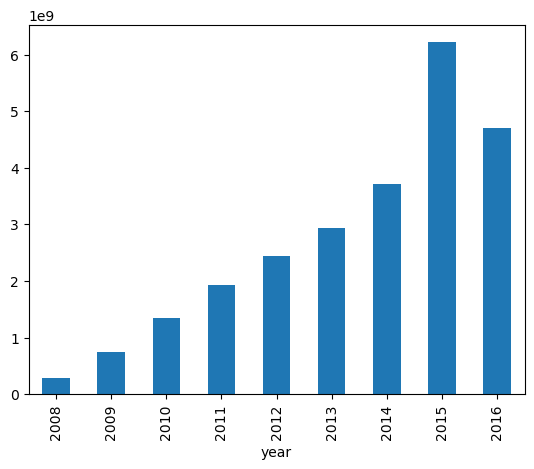

In [11]:
train_df['published'] = pd.to_datetime(train_df.published,yearfirst = True)
train_df['year'] = [d.year for d in train_df.published]
train_df['month'] = [d.month for d in train_df.published]
train_df['day'] = [d.day for d in train_df.published]
train_df['hour'] = [d.hour for d in train_df.published]
train_df.groupby(['year'])['post_id'].sum().plot(kind="bar")

In [9]:
features = ['author','flow','domain','title']
train_size = int(0.7*train_df.shape[0])
len(train_df),train_size

(134137, 93895)

In [15]:
X,y=train_df.loc[:,features],train_df['favs_lognorm']
X_test=test_df.loc[:,features]
X_train, X_valid = X.iloc[:train_size, :], X.iloc[train_size:,:]
y_train,y_valid = y.iloc[:train_size],y.iloc[train_size:]
vectorizer_title = TfidfVectorizer(min_df=3,max_df=0.3,ngram_range=(1,3))
X_train_title = vectorizer_title.fit_transform(X_train['title'])
X_valid_title = vectorizer_title.transform(X_valid['title'])
X_test_title = vectorizer_title.transform(X_test['title'])
vectorizer_title.vocabulary_ 


{'новогодний': 31497,
 'подарок': 36257,
 'блоггерам': 14241,
 'wordpress': 12172,
 'новогодний подарок': 31499,
 'сумасшедшие': 45476,
 'яйца': 50489,
 'или': 22661,
 'сервис': 42745,
 'для': 18811,
 'отслеживания': 34225,
 'посетителей': 37373,
 'или сервис': 22833,
 'сервис для': 42751,
 'для отслеживания': 19413,
 'или сервис для': 22834,
 'сервис для отслеживания': 42753,
 'сглаживание': 42460,
 'шрифтов': 49862,
 'отрисовка': 34214,
 'сглаживание шрифтов': 42461,
 'почему': 37632,
 'мне': 28231,
 'не': 30755,
 'нравится': 31925,
 'iphone': 5951,
 'почему мне': 37659,
 'мне не': 28233,
 'не нравится': 30851,
 'всеобщая': 16456,
 'доступность': 20285,
 'действии': 18272,
 'чем': 49165,
 'суть': 45504,
 'проекта': 39310,
 'ru': 9541,
 'search': 9842,
 'запускается': 21584,
 'понедельник': 37201,
 'mobile': 7315,
 'выбор': 16759,
 'способа': 44575,
 'связи': 42437,
 'обзор': 32095,
 'под': 36147,
 'windows': 11973,
 'под windows': 36185,
 'онлайн': 33063,
 'банкинг': 13661,
 'оформле

In [16]:
print(len(vectorizer_title.vocabulary_))

50624


In [29]:
vectorizer = TfidfVectorizer(analyzer="char")
X_train_title_ch = vectorizer.fit_transform(X_train['title'])
X_valid_title_ch = vectorizer.transform(X_valid['title'])
X_test_title_ch = vectorizer.transform(X_test['title'])
print(len(vectorizer.vocabulary_))

218


In [21]:
feats = ['author','flow','domain']
X_train[feats][:5]
X_train[feats][:5].fillna('-').T.to_dict()
dict_vect = DictVectorizer()
dict_vect_matrix = dict_vect.fit_transform(X_train[feats][:5].fillna('-').T.to_dict().values())
dict_vect_matrix.toarray()


array([[0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 1., 0., 1., 0., 0.]])

In [22]:
dict_vect_matrix.shape

(5, 9)

In [24]:
for col in feats:
    print(col,len(X_train[col][:5].fillna('-').unique()))
dict_vect.feature_names_

author 4
flow 3
domain 2


['author=@DezmASter',
 'author=@Taoorus',
 'author=@Tapac',
 'author=@dennydo',
 'domain=geektimes.ru',
 'domain=habrahabr.ru',
 'flow=-',
 'flow=design',
 'flow=develop']

In [28]:
vectorizer_feats = DictVectorizer()
X_train_feats = vectorizer_feats.fit_transform(X_train[feats].fillna('-').T.to_dict().values())
X_valid_feats = vectorizer_feats.transform(X_valid[feats].fillna('-').T.to_dict().values())
X_test_feats = vectorizer_feats.transform(X_test[feats].fillna('-').T.to_dict().values())
X_train_feats.shape

(93895, 17869)

In [30]:
X_train_new = scipy.sparse.hstack([X_train_title,X_train_feats,X_train_title_ch])
X_valid_new = scipy.sparse.hstack([X_valid_title,X_valid_feats,X_valid_title_ch])
X_test_new = scipy.sparse.hstack([X_test_title,X_test_feats,X_test_title_ch])

In [35]:
model1 = Ridge(alpha=0.1,random_state=1)
model1.fit(X_train_new,y_train)
train_preds1 = model1.predict(X_train_new)
test_preds1 = model1.predict(X_valid_new)
print(mean_squared_error(y_train,train_preds1))
print(mean_squared_error(y_valid,test_preds1))

0.5720601326747422
0.8877282016666125


In [36]:
model2 = Ridge(alpha=1.0, random_state=1)
model2.fit(X_train_new,y_train)
train_preds2 = model2.predict(X_train_new)
test_preds2 = model2.predict(X_valid_new)
print(mean_squared_error(y_train,train_preds2))
print(mean_squared_error(y_valid,test_preds2))

0.5970402239698724
0.8701340382117443


In [41]:
model = Ridge()
X_new = scipy.sparse.vstack([X_train_new,X_valid_new])
model.fit(X_new,y)
test_preds = model.predict(X_test_new)
sample_submission = pd.read_csv('habr_sample_submission.csv', 
                                index_col='url')
sample_submission.head()
ridge_submission = sample_submission.copy()
ridge_submission['favs_lognorm'] = test_preds
ridge_submission.to_csv('ridge_baseline.csv')

None
